<a href="https://colab.research.google.com/github/ayuksekdag/winacademy_python_dna/blob/main/pandas_country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependent_territories_by_birth_rate")
countries = tables[0]
countries.head(3)

,Country/territory,WB 2018 (Rate ‰),OECD 2011 (Rate ‰),CIA WF 2013 (Rate ‰),CIA WF 2014 (Rate ‰),CIA WF 2020 (Rate ‰),PRB 2022 (Rate ‰)
,Country/territory,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1,Unnamed: 6_level_1
0,Afghanistan,32.0,45.1,39.05,38.84,36.7,36.0
1,Albania,12.0,11.5,12.57,12.73,13.0,10.0
2,Algeria,24.0,24.8,24.25,23.99,20.0,22.0


In [2]:
countries = countries.droplevel(1, axis=1) 
#regel 1 wordt gedropped
countries.head(3)

,Country/territory,WB 2018 (Rate ‰),OECD 2011 (Rate ‰),CIA WF 2013 (Rate ‰),CIA WF 2014 (Rate ‰),CIA WF 2020 (Rate ‰),PRB 2022 (Rate ‰)
0,Afghanistan,32.0,45.1,39.05,38.84,36.7,36.0
1,Albania,12.0,11.5,12.57,12.73,13.0,10.0
2,Algeria,24.0,24.8,24.25,23.99,20.0,22.0


In [3]:
countries.rename(columns={'Country/territory':'country', 'WB 2018 (Rate ‰)':'WB2018', 'OECD 2011 (Rate ‰)':'OECD2011','CIA WF 2013 (Rate ‰)':'CIAWF2013',
       'CIA WF 2014 (Rate ‰)':'CIAWF2014', 'CIA WF 2020 (Rate ‰)':'CIAWF2020', 'PRB 2022 (Rate ‰)':'PRB2022',
       }, inplace=True)
countries.columns

Index(['country', 'WB2018', 'OECD2011', 'CIAWF2013', 'CIAWF2014', 'CIAWF2020',
       'PRB2022'],
      dtype='object')

In [4]:
countries.head(3)

,country,WB2018,OECD2011,CIAWF2013,CIAWF2014,CIAWF2020,PRB2022
0,Afghanistan,32.0,45.1,39.05,38.84,36.7,36.0
1,Albania,12.0,11.5,12.57,12.73,13.0,10.0
2,Algeria,24.0,24.8,24.25,23.99,20.0,22.0


In [5]:
#select sovereign states
# filter != '%(%'. -> sovereign states
# filter = '%(%' -> non soverieng states

nonsov = countries[countries['country'].str.contains('\(')]

print(nonsov.shape)

#-->non sovereign states
# ~. --> opposite 
sov = countries[~countries['country'].str.contains('\(')]

print(sov.shape)


(36, 7)
(202, 7)


In [22]:
#birth rate larger than 40
sov[sov['PRB2022'] > 40]

,country,WB2018,OECD2011,CIAWF2013,CIAWF2014,CIAWF2020,PRB2022,dif
32,Central African Republic,35.0,33.2,35.80,35.45,33.2,43.0,-2.60
33,Chad,42.0,43.2,37.99,37.29,41.7,43.0,3.71
38,Congo DR,41.0,31.9,39.63,36.59,41.0,42.0,1.37
107,Mali,42.0,45.4,46.06,45.53,42.2,42.0,-3.86
127,Niger,46.0,46.0,46.84,46.12,47.5,45.0,0.66
160,Somalia,42.0,42.3,41.45,40.87,38.7,44.0,-2.75


In [46]:
sov['dif'] = sov.eval("CIAWF2020 - CIAWF2013 < -7")

<ipython-input-46-d55790c04663>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sov['dif'] = sov.eval("CIAWF2020 - CIAWF2013 < -7")


<BarContainer object of 3 artists>

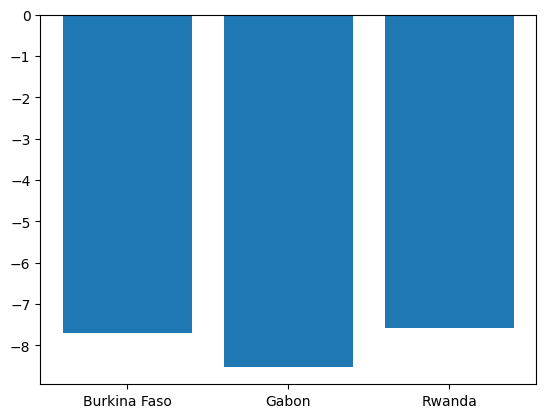

In [47]:
import matplotlib.pyplot as plt

plt.bar(res['country'], res['dif'])

In [16]:
#Select the countries that have "stan" in their name and a birthrate that's lower than 25 
#according to the CIA in 2020. Select only the columns for country and CIA 2020 birth rate.

sov.loc[ (sov['country'].str.contains('stan')) & (sov['CIAWF2020'] < 25) ]


,country,WB2018,OECD2011,CIAWF2013,CIAWF2014,CIAWF2020,PRB2022,dif
86,Kazakhstan,22.0,22.5,20.03,19.61,16.4,23.0,-3.63
92,Kyrgyzstan,27.0,27.1,23.67,23.33,20.6,24.0,-3.07
171,Tajikistan,31.0,28.7,25.49,24.99,21.8,27.0,-3.69
180,Turkmenistan,24.0,21.7,19.53,19.46,18.3,22.0,-1.23
188,Uzbekistan,23.0,21.5,17.20,17.02,16.1,26.0,-1.10
